# Project 2 - Programming for Data Analysis



### An analysis of paleo-present climate data

• Analyse CO2 vs Temperature Anomaly from 800kyrs – present.

• Examine one other (paleo/modern) features (e.g. CH4 or polar ice-coverage)

• Examine Irish context:
    o Climate change signals: (see Maynooth study: The emergence of a climate change
signal in long-term Irish meteorological observations - ScienceDirect)

• Fuse and analyse data from various data sources and format fused data set as a pandas
dataframe and export to csv and json formats

• For all of the above variables, analyse the data, the trends and the relationships between them (temporal leads/lags/frequency analysis).

• Predict global temperature anomaly over next few decades (synthesise data) and compare to published climate models if atmospheric CO2 trends continue
• Comment on accelerated warming based on very latest features (e.g. temperature/polar-icecoverage)

Use a Jupyter notebook for your analysis and track your progress using GitHub.
Use an academic referencing style


NB
parts per million (ppm) CO2
kiloyears -  kyr 

BP -before present

present -1950
ref:  (https://www.sedgeochem.uni-bremen.de/kiloyears.html)



In [117]:
#imports

import pandas as pd

import matplotlib.pyplot as plt


#  1. Data loading

### Datasets for CO2 analysis

In [118]:
# read data from each sheet into separate DataFrames
df_new_co2_data = pd.read_excel('datasets/41586_2008_BFnature06949_MOESM31_ESM.xls', sheet_name='1.  new CO2 data')
df_vostok_td_dome_c = pd.read_excel('datasets/41586_2008_BFnature06949_MOESM31_ESM.xls', sheet_name='2.  Vostok-TD-Dome C')
df_composite_co2 = pd.read_excel('datasets/41586_2008_BFnature06949_MOESM31_ESM.xls', sheet_name='3.  Composite CO2')

In [119]:
print("1. new CO2 data:")
print(df_new_co2_data.head(15))

1. new CO2 data:
   Dome C (611-800 kyr BP)       Unnamed: 1  Unnamed: 2    Unnamed: 3   
0       Lüthi et al. (sub)              NaN         NaN           NaN  \
1                      NaN              NaN         NaN           NaN   
2                      NaN              NaN         NaN           NaN   
3                      NaN              NaN         NaN           NaN   
4       University of Bern              NaN         NaN           NaN   
5                Depth (m)  EDC3_gas_a (yr)  CO2 (ppmv)  sigma (ppmv)   
6                  3026.58           611269       257.8           2.1   
7                  3030.97           616164       252.6           0.6   
8                  3036.44           623109       243.3           2.8   
9                  3040.87           630183       204.4           0.9   
10                 3043.07           635364         195           1.5   
11                 3055.18           658404       187.5           1.8   
12                 3056.25        

In [120]:
print("2. Vostok-TD-Dome C:")
print(df_vostok_td_dome_c.head())

2. Vostok-TD-Dome C:
   Dome C (0-22 kyr BP) Unnamed: 1 Unnamed: 2 Unnamed: 3   
0  Monnin et al. (2001)        NaN        NaN        NaN  \
1                   NaN        NaN        NaN        NaN   
2                   NaN        NaN        NaN        NaN   
3          measured at:        NaN        NaN        NaN   
4    University of Bern        NaN        NaN        NaN   

   Vostok (0-440 kyr BP) Unnamed: 5 Unnamed: 6 Taylor Dome (19-63 kyr BP)   
0    Petit et al. (1999)        NaN        NaN   Indermühle et al. (2000)  \
1    Pepin et al. (2001)        NaN        NaN                        NaN   
2  Raynaud et al. (2005)        NaN        NaN                        NaN   
3                    NaN        NaN        NaN                        NaN   
4       LGGE in Grenoble        NaN        NaN         University of Bern   

  Unnamed: 8 Unnamed: 9  ...       Unnamed: 15 Unnamed: 16 Unnamed: 17   
0        NaN        NaN  ...               NaN         NaN         NaN  \
1      

In [121]:
print("3. Composite CO2:")
print(df_composite_co2.head())

3. Composite CO2:
  Composite CO2 record (0-800 kyr BP)   
0                        0-22 kyr BP:  \
1                      22-393 kyr BP:   
2                     393-416 kyr BP:   
3                     416-664 kyr BP:   
4                     664-800 kyr BP:   

                                          Unnamed: 1  
0  Dome C (Monnin et al. 2001) measured at Univer...  
1  Vostok (Petit et al. 1999; Pepin et al. 2001; ...  
2  Dome C (Siegenthaler et al. 2005) measured at ...  
3  Dome C (Siegenthaler et al. 2005)  measured at...  
4  Dome C (Luethi et al. (sub)) measured at Unive...  


Files have lots of extra rows with information that should be cleaned or divided into new dataFrames.

## 1.2 Creating extra DataFrames to store data from files

Dataset 1: 

Page 1 'new CO2 data': CO2 record from the EPICA Dome C 1999 (EDC99) ice core (Antarctica) covering 650 to 800 kyr BP measured at the University of Bern, Switzerland. PANGAEA


New data has been measured in Bern on 1237 samples at 289 depth intervals. Sample ages range from 611 to 799 kyr BP (EDC3_gas_a age scale: Loulergue et al., 2007, Climate of the Past, 3, 527-540, http://www.clim-past.net/3/527/2007/; data: doi:10.1594/PANGAEA.671367).

Parameters:

\begin{array}{|c|c|c|c|c|c|}
\hline
\text{Name} & \text{Short Name} & \text{Unit} & \text{PI} & \text{Method/Device} & \text{Comment} \\
\hline
1 & \text{DEPTH, ice/snow} & \text{m} &  \text{ } &  \text{ }& \text{Geocode} \\
\hline
2 & \text{Gas age} & \text{ka BP} & \text{Lüthi}&  \text{ } & \text{ based on EDC3 timescale} \\
\hline
3 & \text{CO}_2 & \text{ppmv} & \text{Lüthi} & \\
\hline
4 & \text{CO}_2 \text{ std dev} & \pm & \text{Lüthi} & \\
\hline
\end{array}


Reference: 

Lüthi, Dieter; Le Floch, Martine; Bereiter, Bernhard; Blunier, Thomas; Barnola, Jean-Marc; Siegenthaler, Urs; Raynaud, Dominique; Jouzel, Jean; Fischer, Hubertus; Kawamura, Kenji; Stocker, Thomas F (2008): CO2 record from the EPICA Dome C 1999 (EDC99) ice core (Antarctica) covering 650 to 800 kyr BP measured at the University of Bern, Switzerland. PANGAEA, https://doi.org/10.1594/PANGAEA.710901, In supplement to: Lüthi, D et al. (2008): High-resolution carbon dioxide concentration record 650,000 - 800,000 years before present. Nature, 453, 379-382, https://doi.org/10.1038/nature06949



### page 1 new CO2 data

In [122]:
df_new_co2_data = pd.read_excel('datasets/41586_2008_BFnature06949_MOESM31_ESM.xls', sheet_name='1.  new CO2 data', skiprows=3, header=3)

df_new_co2_data

,Depth (m),EDC3_gas_a (yr),CO2 (ppmv),sigma (ppmv),Depth (m).1,EDC3_gas_a (yr).1,CO2 (ppmv).1
0,3026.58,611269,257.8,2.1,3061.71,667435.0,178.5
1,3030.97,616164,252.6,0.6,3063.98,670124.0,189.0
2,3036.44,623109,243.3,2.8,3085.78,688035.0,234.0
3,3040.87,630183,204.4,0.9,3086.88,688751.0,235.4
4,3043.07,635364,195.0,1.5,3087.98,689444.0,241.0
...,...,...,...,...,...,...,...
242,3187.87,794608,199.4,1.7,NaN,NaN,NaN
243,3188.23,795202,195.2,2.0,NaN,NaN,NaN
244,3188.98,796467,189.3,2.1,NaN,NaN,NaN
245,3189.33,797099,188.4,1.4,NaN,NaN,NaN


In [123]:
# extract the relevant columns for 'University of Bern'
df_bern = df_new_co2_data.iloc[:, :4].copy()
df_bern.columns = pd.MultiIndex.from_product([['University of Bern'], df_bern.columns])

df_bern.head()


University of Bern                                        
           Depth (m) EDC3_gas_a (yr) CO2 (ppmv) sigma (ppmv)
0            3026.58          611269      257.8          2.1
1            3030.97          616164      252.6          0.6
2            3036.44          623109      243.3          2.8
3            3040.87          630183      204.4          0.9
4            3043.07          635364      195.0          1.5

In [124]:
# extract the relevant columns for 'LGGE in Grenoble'
df_grenoble = df_new_co2_data.iloc[:, 4:].copy()
df_grenoble.columns = pd.MultiIndex.from_product([['LGGE in Grenoble'], df_grenoble.columns])

df_grenoble.head()


LGGE in Grenoble                               
       Depth (m).1 EDC3_gas_a (yr).1 CO2 (ppmv).1
0          3061.71          667435.0        178.5
1          3063.98          670124.0        189.0
2          3085.78          688035.0        234.0
3          3086.88          688751.0        235.4
4          3087.98          689444.0        241.0

### page 2

In [125]:
df_vostok_td_dome_c = pd.read_excel('datasets/41586_2008_BFnature06949_MOESM31_ESM.xls', sheet_name='2.  Vostok-TD-Dome C', skiprows=3, header=3)
df_vostok_td_dome_c

,Depth (m),EDC3_gas_a (yr),CO2 (ppmv),sigma (ppmv),Depth (m).1,EDC3_gas_a (yr).1,CO2 (ppmv).1,Depth (m).2,tentatively synchronized on EDC3_gas_a (yr),CO2 (ppmv).2,...,Depth (m).4,EDC3_gas_a (yr).3,CO2 (ppmv).4,Depth (m).5,EDC3_gas_a (yr).4,CO2 (ppmv).5,sigma (ppmv).3,Depth (m).6,EDC3_gas_a (yr).5,CO2 (ppmv).6
0,102.83,137.0,280.4,1.8,149.10,2690,284.7,380.82,18906.0,190.5,...,2700.77,392544.0,259.5,3026.58,611269.0,257.8,2.1,3061.71,667435.0,178.5
1,106.89,268.0,274.9,0.7,173.10,3897,272.7,382.42,23379.0,189.1,...,2702.97,393579.0,273.6,3030.97,616164.0,252.6,0.6,3063.98,670124.0,189.0
2,107.20,279.0,277.9,0.7,177.40,4124,268.1,382.76,24011.0,189.0,...,2705.17,394560.0,260.7,3036.44,623109.0,243.3,2.8,3085.78,688035.0,234.0
3,110.25,395.0,279.1,1.3,228.60,6735,262.2,383.54,25337.0,187.7,...,2713.97,398086.0,276.3,3040.87,630183.0,204.4,0.9,3086.88,688751.0,235.4
4,110.50,404.0,281.9,1.1,250.30,7873,254.5,385.33,27507.0,195.2,...,2718.37,399722.0,277.1,3043.07,635364.0,195.0,1.5,3087.98,689444.0,241.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,NaN,NaN,NaN,NaN,3340.39,428394,229.7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
368,NaN,NaN,NaN,NaN,3343.39,433925,199.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
369,NaN,NaN,NaN,NaN,3346.51,437580,201.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
370,NaN,NaN,NaN,NaN,3346.56,437601,207.8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
# Extract 'Dome C (0-22 kyr BP)' for 'University of Bern'
df_dome_c_0_22_bern = df_vostok_td_dome_c.iloc[:, 0:4].copy()
df_dome_c_0_22_bern.columns = pd.MultiIndex.from_product([['dome_c_0-22_bern'], df_dome_c_0_22_bern.columns])
df_dome_c_0_22_bern

dome_c_0-22_bern                                        
           Depth (m) EDC3_gas_a (yr) CO2 (ppmv) sigma (ppmv)
0             102.83           137.0      280.4          1.8
1             106.89           268.0      274.9          0.7
2             107.20           279.0      277.9          0.7
3             110.25           395.0      279.1          1.3
4             110.50           404.0      281.9          1.1
..               ...             ...        ...          ...
367              NaN             NaN        NaN          NaN
368              NaN             NaN        NaN          NaN
369              NaN             NaN        NaN          NaN
370              NaN             NaN        NaN          NaN
371              NaN             NaN        NaN          NaN

[372 rows x 4 columns]

In [127]:
# Extract 'Vostok (0-440 kyr BP)' for 'LGGE in Grenoble'
df_vostok_0_440_grenoble = df_vostok_td_dome_c.iloc[:, 4:7].copy()
df_vostok_0_440_grenoble.columns = pd.MultiIndex.from_product([['vostok_0-440_grenoble'], df_vostok_0_440_grenoble.columns])
df_vostok_0_440_grenoble

vostok_0-440_grenoble                               
              Depth (m).1 EDC3_gas_a (yr).1 CO2 (ppmv).1
0                  149.10              2690        284.7
1                  173.10              3897        272.7
2                  177.40              4124        268.1
3                  228.60              6735        262.2
4                  250.30              7873        254.5
..                    ...               ...          ...
367               3340.39            428394        229.7
368               3343.39            433925        199.0
369               3346.51            437580        201.5
370               3346.56            437601        207.8
371               3349.51            438986        205.9

[372 rows x 3 columns]

In [128]:
# Extract 'Taylor Dome (19-63 kyr BP)' for 'University of Bern'
df_taylor_19_63_bern = df_vostok_td_dome_c.iloc[:, 7:11].copy()
df_taylor_19_63_bern.columns = pd.MultiIndex.from_product([['taylor_19-63_bern'], df_taylor_19_63_bern.columns])
df_taylor_19_63_bern

taylor_19-63_bern                                               
          Depth (m).2 tentatively synchronized on EDC3_gas_a (yr)   
0              380.82                                     18906.0  \
1              382.42                                     23379.0   
2              382.76                                     24011.0   
3              383.54                                     25337.0   
4              385.33                                     27507.0   
..                ...                                         ...   
367               NaN                                         NaN   
368               NaN                                         NaN   
369               NaN                                         NaN   
370               NaN                                         NaN   
371               NaN                                         NaN   

                                 
    CO2 (ppmv).2 sigma (ppmv).1  
0          190.5            1.0  
1          189.1            0.5  
2          189.0            1.4  
3          187.7            1.0  
4          195.2            0.5  
..           ...            ...  
367          NaN            NaN  
368          NaN            NaN  
369          NaN            NaN  
370          NaN            NaN  
371          NaN            NaN  

[372 rows x 4 columns]

In [129]:
# Extract 'Dome C (393-664 kyr BP)' for 'University of Bern'
df_dome_c_393_664_bern = df_vostok_td_dome_c.iloc[:, 11:15].copy()
df_dome_c_393_664_bern.columns = pd.MultiIndex.from_product([['dome_c_393-664_bern'], df_dome_c_393_664_bern.columns])
df_dome_c_393_664_bern

dome_c_393-664_bern                                              
            Depth (m).3 EDC3_gas_a (yr).2 CO2 (ppmv).3 sigma (ppmv).2
0               2761.85          415717.0        276.4            1.6
1               2762.89          416193.0        271.7            1.2
2               2765.08          417191.0        273.4            1.5
3               2766.18          417698.0        271.8            1.7
4               2767.33          418245.0        274.6            1.8
..                  ...               ...          ...            ...
367                 NaN               NaN          NaN            NaN
368                 NaN               NaN          NaN            NaN
369                 NaN               NaN          NaN            NaN
370                 NaN               NaN          NaN            NaN
371                 NaN               NaN          NaN            NaN

[372 rows x 4 columns]

In [130]:
# Extract 'Dome C (393-664 kyr BP)' for 'LGGE in Grenoble'
df_dome_c_393_664_grenoble = df_vostok_td_dome_c.iloc[:, 15:18].copy()
df_dome_c_393_664_grenoble.columns = pd.MultiIndex.from_product([['dome_c_393-664_grenoble'], df_dome_c_393_664_grenoble.columns])
df_dome_c_393_664_grenoble

dome_c_393-664_grenoble                               
                Depth (m).4 EDC3_gas_a (yr).3 CO2 (ppmv).4
0                   2700.77          392544.0        259.5
1                   2702.97          393579.0        273.6
2                   2705.17          394560.0        260.7
3                   2713.97          398086.0        276.3
4                   2718.37          399722.0        277.1
..                      ...               ...          ...
367                     NaN               NaN          NaN
368                     NaN               NaN          NaN
369                     NaN               NaN          NaN
370                     NaN               NaN          NaN
371                     NaN               NaN          NaN

[372 rows x 3 columns]

In [131]:
# Extract 'Dome C (611-800 kyr BP)' for 'University of Bern'
df_dome_c_611_800_bern = df_vostok_td_dome_c.iloc[:, 18:22].copy()
df_dome_c_611_800_bern.columns = pd.MultiIndex.from_product([['dome_c_611-800_bern'], df_dome_c_611_800_bern.columns])
df_dome_c_611_800_bern

dome_c_611-800_bern                                              
            Depth (m).5 EDC3_gas_a (yr).4 CO2 (ppmv).5 sigma (ppmv).3
0               3026.58          611269.0        257.8            2.1
1               3030.97          616164.0        252.6            0.6
2               3036.44          623109.0        243.3            2.8
3               3040.87          630183.0        204.4            0.9
4               3043.07          635364.0        195.0            1.5
..                  ...               ...          ...            ...
367                 NaN               NaN          NaN            NaN
368                 NaN               NaN          NaN            NaN
369                 NaN               NaN          NaN            NaN
370                 NaN               NaN          NaN            NaN
371                 NaN               NaN          NaN            NaN

[372 rows x 4 columns]

In [132]:
# Extract 'Dome C (611-800 kyr BP)' for 'LGGE in Grenoble'
df_dome_c_611_800_grenoble = df_vostok_td_dome_c.iloc[:, 22:25].copy()
df_dome_c_611_800_grenoble.columns = pd.MultiIndex.from_product([['dome_c_611-800_grenoble'], df_dome_c_611_800_grenoble.columns])
df_dome_c_611_800_grenoble

dome_c_611-800_grenoble                               
                Depth (m).6 EDC3_gas_a (yr).5 CO2 (ppmv).6
0                   3061.71          667435.0        178.5
1                   3063.98          670124.0        189.0
2                   3085.78          688035.0        234.0
3                   3086.88          688751.0        235.4
4                   3087.98          689444.0        241.0
..                      ...               ...          ...
367                     NaN               NaN          NaN
368                     NaN               NaN          NaN
369                     NaN               NaN          NaN
370                     NaN               NaN          NaN
371                     NaN               NaN          NaN

[372 rows x 3 columns]

### page 3

In [133]:
# Extract two columns from the DataFrame
df_composite_co2_subset = df_composite_co2.iloc[:, 0:2].copy()
df_composite_co2_subset.head()

,Composite CO2 record (0-800 kyr BP),Unnamed: 1
0,0-22 kyr BP:,Dome C (Monnin et al. 2001) measured at Univer...
1,22-393 kyr BP:,Vostok (Petit et al. 1999; Pepin et al. 2001; ...
2,393-416 kyr BP:,Dome C (Siegenthaler et al. 2005) measured at ...
3,416-664 kyr BP:,Dome C (Siegenthaler et al. 2005) measured at...
4,664-800 kyr BP:,Dome C (Luethi et al. (sub)) measured at Unive...


In [134]:
df_composite_co2 = pd.read_excel('datasets/41586_2008_BFnature06949_MOESM31_ESM.xls', sheet_name='3.  Composite CO2', skiprows=2, header=4)
df_composite_co2


,EDC3_gas_a (yr),CO2 (ppmv)
0,137,280.4
1,268,274.9
2,279,277.9
3,395,279.1
4,404,281.9
...,...,...
1091,794608,199.4
1092,795202,195.2
1093,796467,189.3
1094,797099,188.4


### Datasets for temperature analysis

**Temperature anomaly:**

In climate change studies, temperature anomalies are more important than absolute temperature. A temperature anomaly is the difference from an average, or baseline, temperature. The baseline temperature is typically computed by averaging 30 or more years of temperature data. A positive anomaly indicates the observed temperature was warmer than the baseline, while a negative anomaly indicates the observed temperature was cooler than the baseline. 
(https://www.ncei.noaa.gov/access/monitoring/dyk/anomalies-vs-temperature)

### source file : epicaDC.deuttemp.EDC3-AICC.xls

In [135]:
df_epicaDC = pd.read_excel('datasets/epicaDC.deuttemp.EDC3-AICC.xls', sheet_name='epicaDC.deuttemp.EDC3-AICC.txt', header=0)

df_epicaDC.head(15)

,bag,ztop,EDC3béta,AICC2012,deutfinal,temp,acc-EDC3beta
0,1,0.00,-50.000000,-55.000000,NaN,218.3,3.105321
1,2,0.55,-43.559770,-50.513333,NaN,218.3,3.104805
2,3,1.10,-37.440190,-46.026667,NaN,218.3,3.104404
3,4,1.65,-31.641560,-41.540000,NaN,218.3,3.104025
4,5,2.20,-24.552780,-34.516667,NaN,218.3,3.103453
5,6,2.75,-17.784220,-27.493333,NaN,218.3,3.102677
6,7,3.30,-11.013050,-20.470000,NaN,218.3,3.101557
7,8,3.85,-3.270300,-12.213333,NaN,218.3,3.099708
8,9,4.40,5.447842,-3.956667,NaN,218.3,3.096691
9,10,4.95,13.529990,4.300000,NaN,218.3,3.092812


In [136]:
df_epicaDC.tail(15)

,bag,ztop,EDC3béta,AICC2012,deutfinal,temp,acc-EDC3beta
5804,5805,3192.20,808416.7,806872.0,-440.1,209.7,1.347
5805,5806,3192.75,809348.4,807941.0,-434.5,210.7,1.470
5806,5807,3193.30,810202.4,809010.0,-436.7,210.3,1.422
5807,5808,3193.85,811085.2,810079.0,-435.4,210.5,1.452
5808,5809,3194.40,811949.6,811148.0,-433.1,210.9,1.506
5809,5810,3194.95,812783.5,812217.0,-432.4,211.0,1.524
5810,5811,3195.50,813607.6,813286.0,-431.7,211.1,1.541
5811,5812,3196.05,814422.8,814355.0,-431.0,211.2,1.558
5812,5813,3196.60,815229.1,815424.0,-431.2,211.2,1.553
5813,5814,3197.15,816037.8,816493.0,-433.1,210.9,1.507


This source file do not have calculated temperature anomalies only absolute temperature and in Kelvin. 

In [137]:
# Column temp should be converted into celsius

df_epicaDC['temn_celsius'] = df_epicaDC['temp']-273.15

In [138]:
mean = df_epicaDC['temn_celsius'][0:87].mean()
df_epicaDC['temp_anomaly'] = df_epicaDC['temn_celsius'] - mean

In [139]:
df_epicaDC.head()

,bag,ztop,EDC3béta,AICC2012,deutfinal,temp,acc-EDC3beta,temn_celsius,temp_anomaly
0,1,0.00,-50.00000,-55.000000,NaN,218.3,3.105321,-54.85,0.888506
1,2,0.55,-43.55977,-50.513333,NaN,218.3,3.104805,-54.85,0.888506
2,3,1.10,-37.44019,-46.026667,NaN,218.3,3.104404,-54.85,0.888506
3,4,1.65,-31.64156,-41.540000,NaN,218.3,3.104025,-54.85,0.888506
4,5,2.20,-24.55278,-34.516667,NaN,218.3,3.103453,-54.85,0.888506


### source file: 
Summary/Abstract:
A high-resolution deuterium profile is now available along the entire European Project for Ice Coring in Antarctica Dome C ice core, extending this climate record back to marine isotope stage 20.2, ~800,000 years ago. Experiments performed with an atmospheric general circulation model including water isotopes support its temperature interpretation. We assessed the general correspondence between Dansgaard-Oeschger events and their smoothed Antarctic counterparts for this Dome C record, which reveals the presence of such features with similar amplitudes during previous glacial periods. We suggest that the interplay between obliquity and precession accounts for the variable intensity of interglacial periods in ice core records.

Reference (https://www.ncei.noaa.gov/access/paleo-search/study/6080)

Link to dataset (https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc3deuttemp2007.txt)

In [140]:
epicaDC_temp_anom=pd.read_csv('datasets\edc3deuttemp2007.csv',skiprows=range(91),delimiter=r"\s+")


Column 1: Bag number (55 cm sample)

Column 2: Top depth (m)

Column 3: EDC3 age scale (years before year 1950)

Column 4: dD data (per mille with respect to SMOW)

Column 5: Temperature estimate (temperature difference from the average of the last 1000 years)


In [141]:
epicaDC_temp_anom.head(15)

,Bag,ztop,Age,Deuterium,Temperature
0,1,0.00,-50.00000,NaN,NaN
1,2,0.55,-43.54769,NaN,NaN
2,3,1.10,-37.41829,NaN,NaN
3,4,1.65,-31.61153,NaN,NaN
4,5,2.20,-24.51395,NaN,NaN
5,6,2.75,-17.73776,NaN,NaN
6,7,3.30,-10.95945,NaN,NaN
7,8,3.85,-3.20879,NaN,NaN
8,9,4.40,5.48176,NaN,NaN
9,10,4.95,13.52038,NaN,NaN


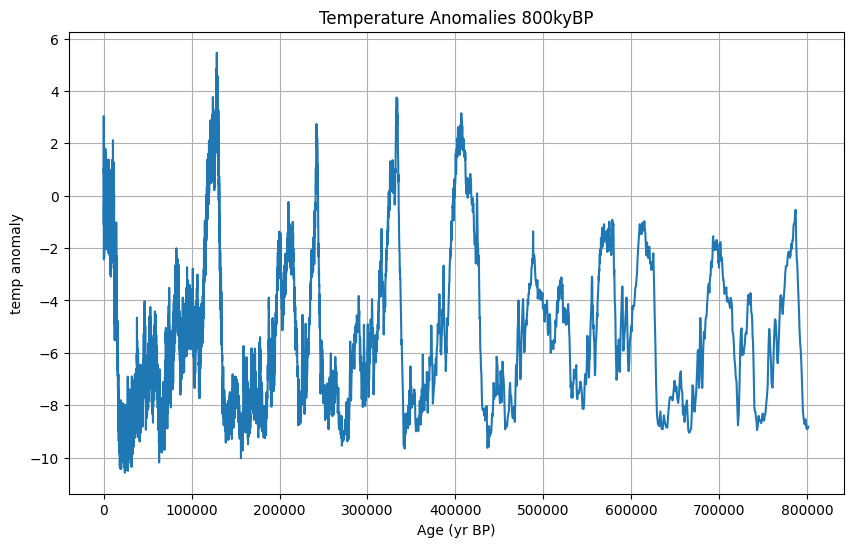

In [142]:
plt.figure(figsize=(10, 6))
plt.plot(epicaDC_temp_anom['Age'], epicaDC_temp_anom['Temperature'], linestyle='-')
plt.title('Temperature Anomalies 800kyBP')
plt.xlabel('Age (yr BP)')
plt.ylabel('temp anomaly')
plt.grid(True)
plt.show()

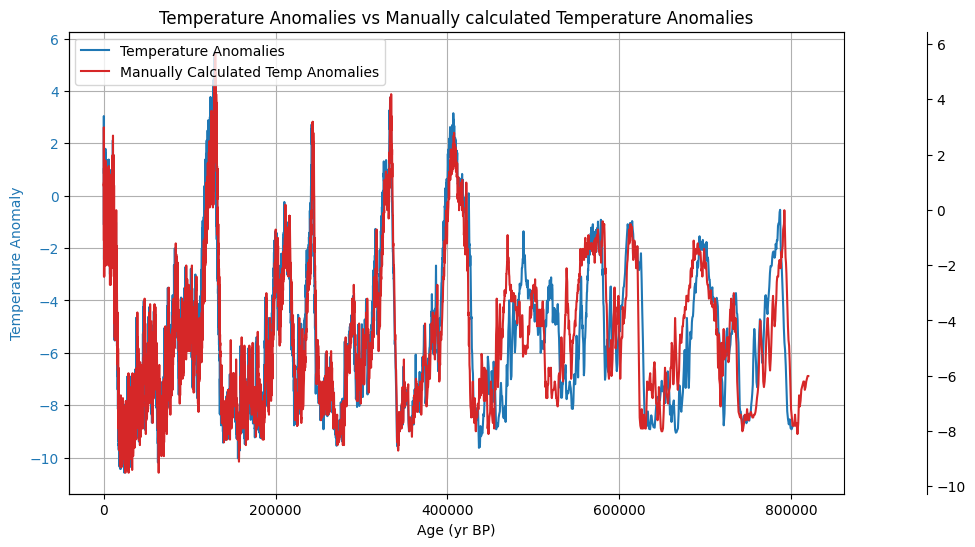

In [144]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the temperature anomaly data on the first y-axis (left)
ax1.plot(epicaDC_temp_anom['Age'], epicaDC_temp_anom['Temperature'], label='Temperature Anomalies', linestyle='-')
ax1.set_xlabel('Age (yr BP)')
ax1.set_ylabel('Temperature Anomaly', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis (right) sharing the same x-axis but higher
ax2 = ax1.twinx()
ax2.spines['right'].set_position(('outward', 60))  # Adjust the position of the second y-axis
ax2.plot(df_epicaDC['EDC3béta'], df_epicaDC['temp_anomaly'], label='Manually Calculated Temp Anomalies', linestyle='-', color='tab:red')

# Set title
plt.title('Temperature Anomalies vs Manually calculated Temperature Anomalies')

# Display the grid
ax1.grid(True)

# Add legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Show the plot
plt.show()

### source file : grl52461-sup-0003-supplementary.xls

Composite of atmospheric CO2 records from Antarctic ice cores

Reference:
Bereiter et al. (2014), Revision of the EPICA Dome C CO2 record from 800 to 600 kyr before present, Geophysical Research Letters, doi: 10.1002/2014GL061957.

This new version of CO2 composite replaces the old version of Lüthi et al. (2008), which contains the analytical bias described in the article mentioned above and lower quality data and many other sections.
For details about the improvements relative to the previous version see supplementary information of the main article.
For detailed references of all records collected in this file also refer to the supplemetary information of the main article.
For latest anthropogenic data refer to NOAA/Mauna Loa record.
Age unit is in years before present (yr BP) whereas present refers to 1950.

Note, not all records shown in sheet "all records" are part of the composite. 
If millennial scale or smaller details of the composite are studied, we recommend to look into all records available for that period and not only in the composite.


In [ ]:
ipcc_co2_composite = pd.read_excel('datasets/grl52461-sup-0003-supplementary.xls', sheet_name='CO2 Composite', header=0)
ipcc_co2_composite

,Composite CO2 record (0-800 kyr BP),Unnamed: 1,Unnamed: 2
0,-51-1800 yr BP:',"Law Dome (Rubino et al., 2013)",NaN
1,1.8-2 kyr BP:,"Law Dome (MacFarling Meure et al., 2006)",NaN
2,2-11 kyr BP:,"Dome C (Monnin et al., 2001 + 2004)",NaN
3,11-22 kyr BP:,"WAIS (Marcott et al., 2014) minus 4 ppmv (see ...",NaN
4,22-40 kyr BP:,"Siple Dome (Ahn et al., 2014)",NaN
...,...,...,...
1910,803925.284376,202.921723,2.064488
1911,804009.870607,207.498645,0.915083
1912,804522.67463,204.861938,1.642851
1913,805132.442334,202.226839,0.689587


In [ ]:
ipcc_co2_composite = pd.read_excel('datasets/grl52461-sup-0003-supplementary.xls', sheet_name='CO2 Composite',skiprows=7, header=7)
ipcc_co2_composite

,Gasage (yr BP),CO2 (ppmv),sigma mean CO2 (ppmv)
0,-51.030000,368.022488,0.060442
1,-48.000000,361.780737,0.370000
2,-46.279272,359.647793,0.098000
3,-44.405642,357.106740,0.159923
4,-43.080000,353.946685,0.043007
...,...,...,...
1896,803925.284376,202.921723,2.064488
1897,804009.870607,207.498645,0.915083
1898,804522.674630,204.861938,1.642851
1899,805132.442334,202.226839,0.689587


In [ ]:
ipcc_co2_composite.columns

Index(['Gasage (yr BP) ', 'CO2 (ppmv)', 'sigma mean CO2 (ppmv)'], dtype='object')

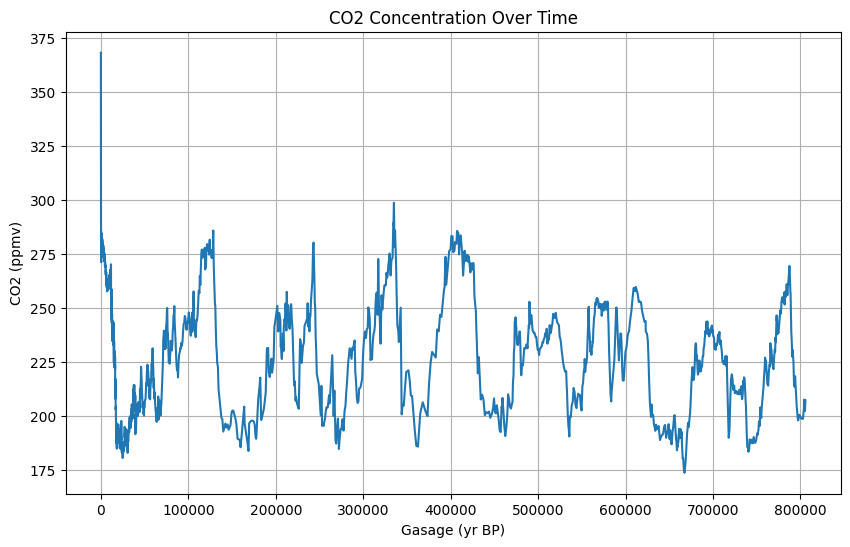

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(ipcc_co2_composite['Gasage (yr BP) '], ipcc_co2_composite['CO2 (ppmv)'], linestyle='-')
plt.title('CO2 Concentration Over Time')
plt.xlabel('Gasage (yr BP)')
plt.ylabel('CO2 (ppmv)')
plt.grid(True)
plt.show()

Visualising data to see if it was imported correctly and we can use it for analysis

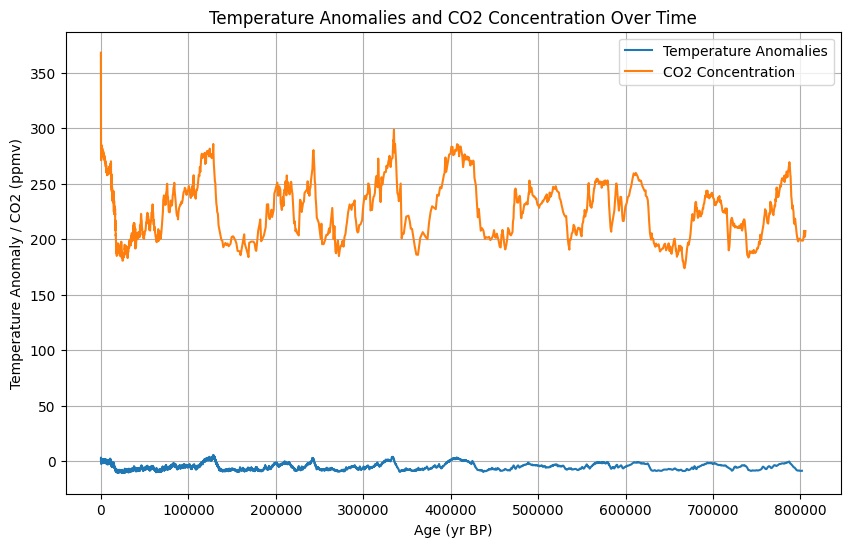

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(epicaDC_temp_anom['Age'], epicaDC_temp_anom['Temperature'], label='Temperature Anomalies', linestyle='-')

plt.plot(ipcc_co2_composite['Gasage (yr BP) '], ipcc_co2_composite['CO2 (ppmv)'], label='CO2 Concentration', linestyle='-')

plt.title('Temperature Anomalies and CO2 Concentration Over Time')
plt.xlabel('Age (yr BP)')
plt.ylabel('Temperature Anomaly / CO2 (ppmv)')

plt.legend()

# Display the grid
plt.grid(True)

# Show the plot
plt.show()

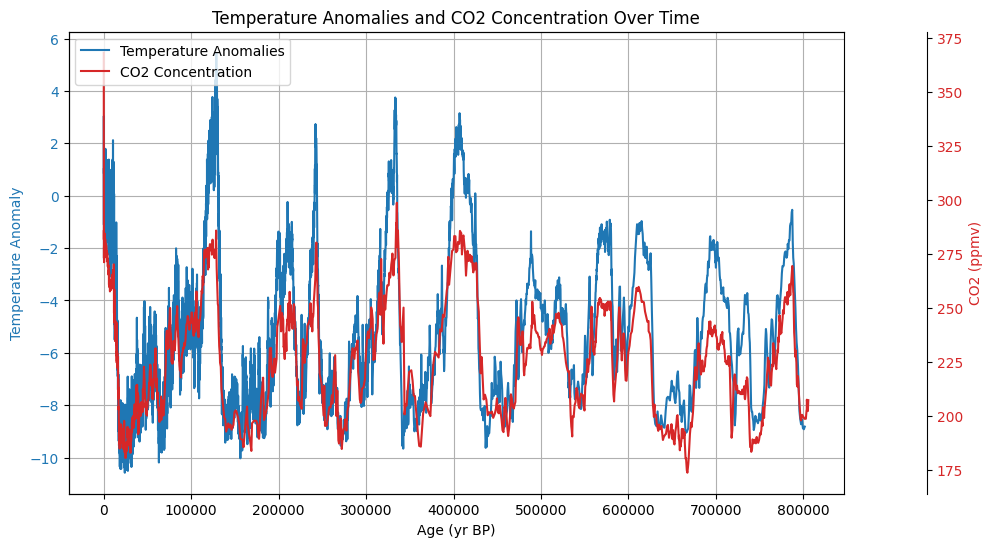

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the temperature anomaly data on the first y-axis (left)
ax1.plot(epicaDC_temp_anom['Age'], epicaDC_temp_anom['Temperature'], label='Temperature Anomalies', linestyle='-')
ax1.set_xlabel('Age (yr BP)')
ax1.set_ylabel('Temperature Anomaly', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis (right) sharing the same x-axis but higher
ax2 = ax1.twinx()
ax2.spines['right'].set_position(('outward', 60))  # Adjust the position of the second y-axis
ax2.plot(ipcc_co2_composite['Gasage (yr BP) '], ipcc_co2_composite['CO2 (ppmv)'], label='CO2 Concentration', linestyle='-', color='tab:red')
ax2.set_ylabel('CO2 (ppmv)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Set title
plt.title('Temperature Anomalies and CO2 Concentration Over Time')

# Display the grid
ax1.grid(True)

# Add legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Show the plot
plt.show()

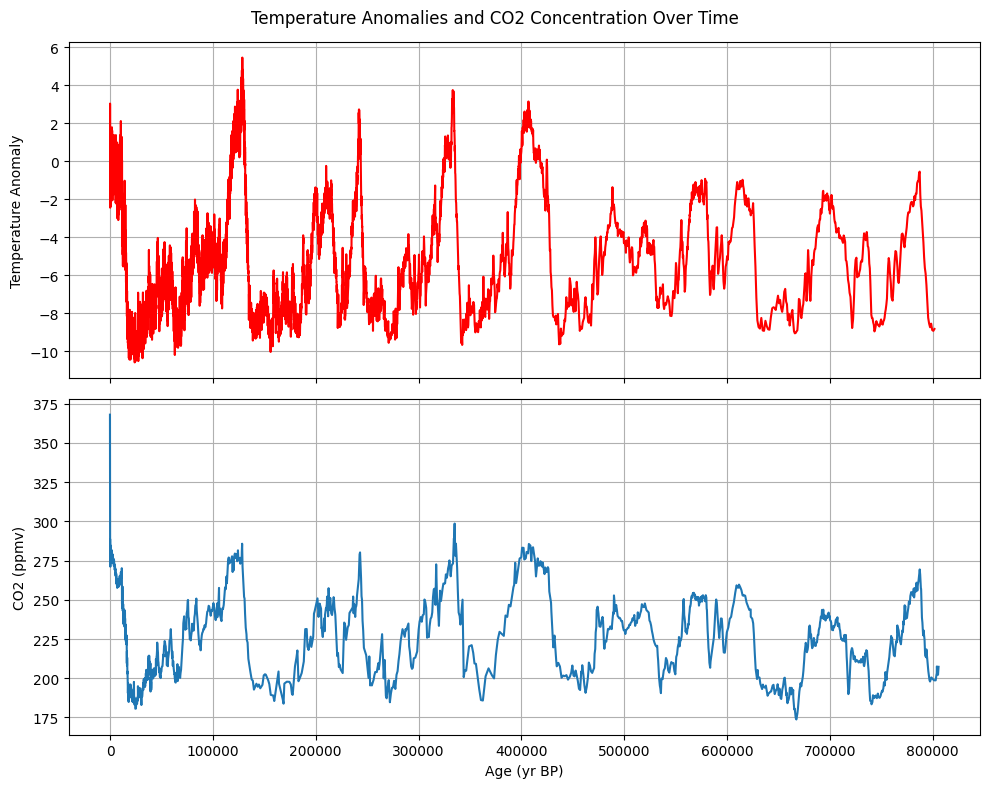

In [ ]:
# Create a figure with two subplots, one above the other
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot the temperature anomaly data on the first subplot (top) in red
ax1.plot(epicaDC_temp_anom['Age'], epicaDC_temp_anom['Temperature'], label='Temperature Anomalies', linestyle='-', color='red')
ax1.set_ylabel('Temperature Anomaly')
ax1.grid(True)

# Plot the CO2 concentration data on the second subplot (bottom)
ax2.plot(ipcc_co2_composite['Gasage (yr BP) '], ipcc_co2_composite['CO2 (ppmv)'], label='CO2 Concentration', linestyle='-')
ax2.set_xlabel('Age (yr BP)')
ax2.set_ylabel('CO2 (ppmv)')
ax2.grid(True)

# Set title for the entire figure
plt.suptitle('Temperature Anomalies and CO2 Concentration Over Time')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

-51-1800 yr BP:'	Law Dome (Rubino et al., 2013) 

1.8-2 kyr BP:	Law Dome (MacFarling Meure et al., 2006)

2-11 kyr BP:	Dome C (Monnin et al., 2001 + 2004)

11-22 kyr BP:	WAIS (Marcott et al., 2014) minus 4 ppmv (see text)

22-40 kyr BP:	Siple Dome (Ahn et al., 2014)

40-60 kyr BP:	TALDICE (Bereiter et al., 2012)

60-115 kyr BP:	EDML (Bereiter et al., 2012)  (nb! extra10kyr)

105-155 kyr BP:	Dome C Sublimation (Schneider et al., 2013)

155-393 kyr BP:	Vostok (Petit et al., 1999)

393-611 kyr BP:	Dome C (Siegenthaler et al., 2005)

612-800 kyr BP:	Dome C (Bereiter et al., 2014)


In [ ]:
ipcc_co2_all_rec = pd.read_excel('datasets/grl52461-sup-0003-supplementary.xls', sheet_name='all records', skiprows=3, header=3)
ipcc_co2_all_rec

,Depth (m),"Gasage (EDC3, yr BP)","Gasage (AICC2012, yr BP)",CO2 (ppmv),sigma mean CO2 (ppmv),Depth (m).1,"Gasage (EDC3, yr BP).1","Gasage (AICC2012, yr BP).1",CO2 (ppmv).1,Depth (m).2,...,"Gasage (WDC06A-7, yr BP).1",CO2 (ppmv).19,sigma mean CO2 (ppmv).16,Depth (m).19,"Gasage (AICC2012, yr BP).13",corrected CO2 (ppmv),analytical sigma mean CO2 (ppmv),Correcting Factor (ppmv),lower bound (2 sigma) of correction F. (ppmv),upper bound (2 sigma) of correction F. (ppmv)
0,102.83,137.0,350.110103,280.4,1.8,149.1,2690.0,NaN,284.7,380.82,...,8893.213,267.902828,3.369565,2950.527500,562654.671212,234.065089,0.938515,0.000000,0.0000,0.45076
1,106.89,268.0,486.693200,274.9,0.7,173.1,3897.0,3661.9285,272.7,382.42,...,8985.488,265.447325,1.429392,2951.822500,563135.783333,240.114724,2.126252,0.000000,0.0000,0.49078
2,107.20,279.0,501.195000,277.9,0.7,177.4,4124.0,3746.6270,268.1,382.76,...,9080.986,268.861214,1.418332,2952.922500,563536.650000,242.288114,0.513847,0.000000,0.0000,0.52478
3,110.25,395.0,539.649455,279.1,1.3,228.6,6735.0,6449.1760,262.2,383.54,...,9176.945,263.952432,1.853741,2954.022500,563928.766667,245.694323,1.769919,0.000000,0.0000,0.55879
4,110.50,404.0,539.894909,281.9,1.1,250.3,7873.0,7567.3510,254.5,385.33,...,9274.864,270.597511,3.848356,2955.122500,564311.433333,245.812943,0.493195,0.000000,0.0000,0.59281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3193.414500,803925.284376,202.921723,2.064488,9.733185,7.4860,11.97000
388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3193.750500,804009.870607,207.498645,0.915083,9.752717,7.4971,11.99800
389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3195.787500,804522.674630,204.861938,1.642851,9.871127,7.5644,12.16700
390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3198.209667,805132.442334,202.226839,0.689587,10.011928,7.6441,12.36900


### source file : LongTermTemperatures_1900-2022_annual.csv

In [ ]:
irish_met_data_file_path = 'datasets/LongTermTemperatures_1900-2022_annual.csv'

# Read Irish meteorological data from the CSV file
df_irish_met_data = pd.read_csv(irish_met_data_file_path)


df_irish_met_data.head()

,year,Annual
0,2022,10.9
1,2021,10.5
2,2020,10.4
3,2019,10.5
4,2018,10.3
